In [1]:
import puq
import h5py
import matplotlib
import numpy
%matplotlib inline

In [2]:
filename='normal_dev0_03.hdf5'

Analyze data from puq
===========

In [3]:
# read data
hf=h5py.File(filename,'r')
# print the parameters
for param in puq.hdf.get_params(hf):
    print param

NormalParameter param_0 (device.material_properties.electrode_material.void_volume_fraction)
	PDF [0.571 - 0.769] mean=0.67  dev=0.0298  mode=0.669
NormalParameter param_1 (device.material_properties.separator_material.void_volume_fraction)
	PDF [0.501 - 0.699] mean=0.6  dev=0.0298  mode=0.599


In [4]:
%%capture --no-display
frequency=numpy.array([],dtype=float)
resistance=numpy.array([],dtype=float)
resistance_error=numpy.array([],dtype=float)
reactance=numpy.array([],dtype=float)
reactance_error=numpy.array([],dtype=float)
modulus=numpy.array([],dtype=float)
modulus_error=numpy.array([],dtype=float)
argument=numpy.array([],dtype=float)
argument_error=numpy.array([],dtype=float)
variables=puq.hdf.get_output_names(hf)
for var in variables:
    pdf=puq.hdf.get_response(hf, var).pdf()
    if var.find('frequency')!=-1:
        frequency=numpy.append(frequency,pdf.mean)
    elif var.find('resistance')!=-1:
        resistance=numpy.append(resistance,pdf.mean)
        resistance_error=numpy.append(resistance_error,pdf.dev)
    elif var.find('reactance')!=-1:
        reactance=numpy.append(reactance,pdf.mean)
        reactance_error=numpy.append(reactance_error,pdf.dev)
    elif var.find('modulus')!=-1:
        modulus=numpy.append(modulus,pdf.mean)
        modulus_error=numpy.append(modulus_error,pdf.dev)
    elif var.find('argument')!=-1:
        argument=numpy.append(argument,pdf.mean)
        argument_error=numpy.append(argument_error,pdf.dev)
    else:
        raise RuntimeError('unexpected variable name '+var)
# frequency are not sorted in the data we get from puq
argsort=frequency.argsort()
frequency=frequency[argsort]
resistance=resistance[argsort]
resistance_error=resistance_error[argsort]
reactance=reactance[argsort]
reactance_error=reactance_error[argsort]
modulus=modulus[argsort]
modulus_error=modulus_error[argsort]
argument=argument[argsort]
argument_error=argument_error[argsort]

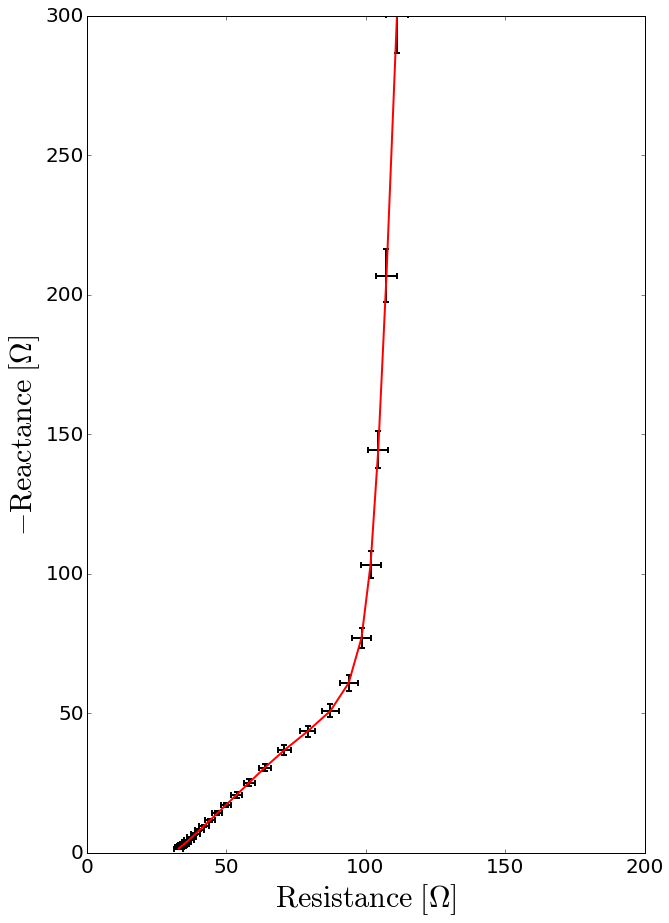

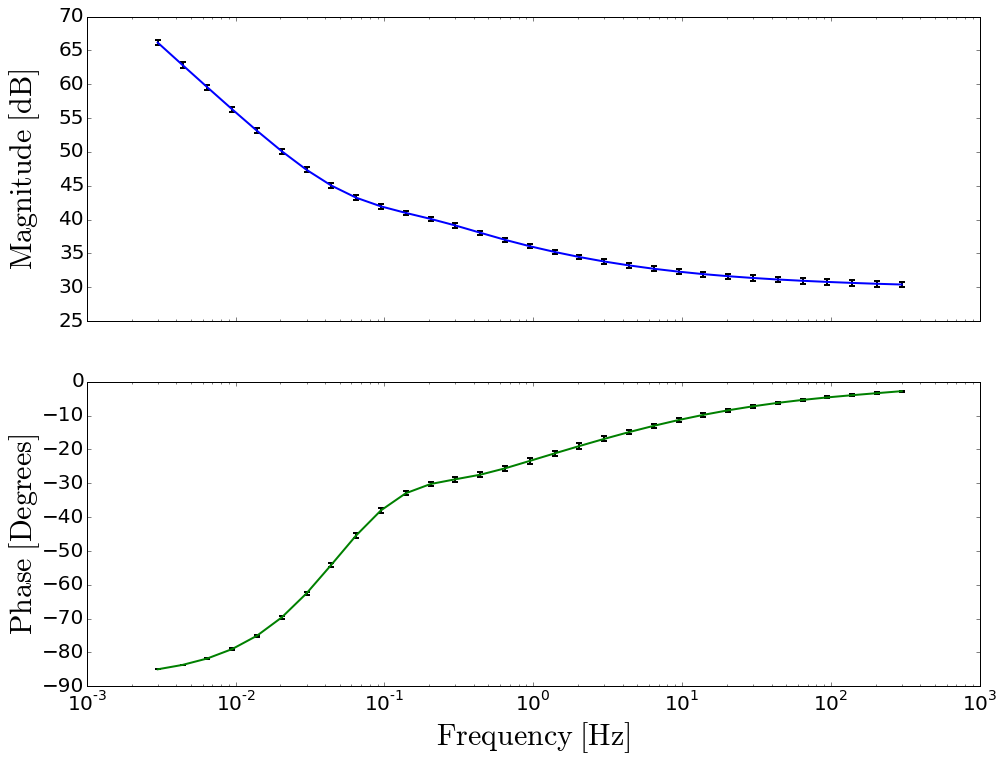

In [5]:
matplotlib.pyplot.figure(figsize=(10,15))
label_fontsize=30
tick_fontsize=20
labelx=-0.05
labely=0.5
matplotlib.pyplot.errorbar(resistance,-reactance,xerr=resistance_error,yerr=-reactance_error,
                           lw=2,color='r',ecolor='k',capthick=2)
matplotlib.pyplot.axis('equal')
matplotlib.pyplot.xlabel(r'$\mathrm{Resistance\ [\Omega]}$',fontsize=label_fontsize)
matplotlib.pyplot.ylabel(r'$\mathrm{-Reactance\ [\Omega]}$',fontsize=label_fontsize)
matplotlib.pyplot.gca().xaxis.set_tick_params(labelsize=tick_fontsize)
matplotlib.pyplot.gca().yaxis.set_tick_params(labelsize=tick_fontsize)
matplotlib.pyplot.xlim(0,200)
matplotlib.pyplot.ylim(0,300)
f,axarr=matplotlib.pyplot.subplots(2,sharex=True,figsize=(16,12))
axarr[0].errorbar(frequency,20*numpy.log10(modulus),yerr=20*modulus_error/modulus/numpy.log(10),
                  lw=2,color='b',ecolor='k',capthick=2)
axarr[0].set_xscale('log')
axarr[0].set_ylabel(r'$\mathrm{Magnitude\ [dB]}$',fontsize=label_fontsize)
axarr[0].get_yaxis().set_tick_params(labelsize=tick_fontsize)
axarr[0].yaxis.set_label_coords(labelx,labely)
axarr[1].errorbar(frequency,argument,yerr=argument_error,
                  lw=2,color='g',ecolor='k',capthick=2)
axarr[1].set_ylabel(r'$\mathrm{Phase\ [Degrees]}$',fontsize=label_fontsize)
axarr[1].set_xlabel(r'$\mathrm{Frequency\ [Hz]}$',fontsize=label_fontsize)
axarr[1].get_yaxis().set_tick_params(labelsize=tick_fontsize)
axarr[1].get_xaxis().set_tick_params(labelsize=tick_fontsize)
axarr[1].yaxis.set_label_coords(labelx,labely)
axarr[1].set_xscale('log')
matplotlib.pyplot.show()

In [6]:
complex_impedance=resistance+1j*reactance

phase=numpy.arctan(reactance/resistance)*180/numpy.pi
Dphase_Dresistance=-reactance/resistance**2*1/(1+(reactance/resistance)**2)*180/numpy.pi
Dphase_Dreactance=1/resistance*1/(1+(reactance/resistance)**2)*180/numpy.pi
phase_error=numpy.sqrt(resistance_error**2*Dphase_Dresistance**2+reactance_error**2*Dphase_Dreactance**2)
print phase
print argument
print phase_error
print argument_error


[-84.99565534 -83.70072284 -81.79726726 -79.02599219 -75.0864393
 -69.66770799 -62.55394993 -54.11172911 -45.43415993 -38.02562525
 -32.95658087 -30.21858888 -28.8166814  -27.46879825 -25.5826858
 -23.37998062 -21.15798134 -18.97766019 -16.86399997 -14.85514536
 -12.98675457 -11.28045494  -9.74868578  -8.39542518  -7.21620663
  -6.20059006  -5.33226428  -4.5877931   -3.93481474  -3.33314997
  -2.7460322 ]
[-84.99426699 -83.69853268 -81.79293605 -79.02040669 -75.07782987
 -69.6582325  -62.54156619 -54.0987515  -45.42208405 -38.01486632
 -32.9476334  -30.21078116 -28.80989243 -27.46385869 -25.58055394
 -23.38047415 -21.1625389  -18.9838446  -16.87152884 -14.86534621
 -12.9987981  -11.29266129  -9.7611403   -8.40754941  -7.22787216
  -6.21062624  -5.34207654  -4.59619873  -3.94280028  -3.33995971
  -2.75218423]
[ 0.30030606  0.37127883  0.47543483  0.62393365  0.82428553  1.08109538
  1.3550863   1.56555427  1.64781974  1.59775717  1.49542234  1.42326324
  1.37742896  1.3336294   1.273548

In [7]:
magnitude=20*numpy.log10(numpy.sqrt(resistance**2+reactance**2))
Dmagnitude_Dresistance=2*resistance/(2*numpy.sqrt(resistance**2+reactance**2))*20/numpy.log(10)/magnitude
Dmagnitude_Dreactance=2*reactance/(2*numpy.sqrt(resistance**2+reactance**2))*20/numpy.log(10)/magnitude
magnitude_error=numpy.sqrt(resistance_error**2*Dmagnitude_Dresistance**2+reactance_error**2*Dmagnitude_Dreactance**2)
print magnitude
print 20*numpy.log10(modulus)
print magnitude_error
print 20*modulus_error/modulus/numpy.log(10)

[ 66.16007952  62.84844791  59.55690189  56.30487903  53.13128473
  50.10805007  47.35497984  45.02467022  43.23081641  41.94491883
  40.98155945  40.097652    39.12433754  38.05548439  37.00508292
  36.0562734   35.21229237  34.46022247  33.79682363  33.22007728
  32.72156661  32.29456691  31.93068017  31.62145736  31.35886819
  31.1350859   30.94319251  30.77647877  30.63002812  30.50123925
  30.39145594]
[ 66.16007832  62.84845607  59.55695113  56.30502429  53.13137973
  50.10831541  47.35533658  45.02476656  43.23123507  41.94541255
  40.98220897  40.09815771  39.12470644  38.05601498  37.00578678
  36.05703636  35.21309206  34.46041809  33.79757939  33.2206383
  32.72187517  32.29498219  31.93099812  31.62154103  31.35924397
  31.13531064  30.94348101  30.77681447  30.63017962  30.50134836
  30.39149836]
[ 12.07362071   8.64083908   6.19120156   4.43239175   3.16142918
   2.23795551   1.56955932   1.10999212   0.84164615   0.71899182
   0.65927048   0.61669753   0.56617278   0.518